In [57]:
import pandas as pd

data = pd.read_csv("data.csv")

# EDA

#### Not much deviation in 'health' and 'life_expec'

In [58]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### No missing values

In [59]:
missing_vals = data.isnull().sum()
print(missing_vals)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


### Strong Positive Correlation between:
##### 1. gdpp and income (0.90)
##### 2. total_fer and child_mort (0.85)
##### 3. imports and exports (0.74)
##### 4. income and life_expec (0.61)
##### 5. gdpp and life_expec (0.60)

### Strong Negative Correlation between:
##### 1. child_mort and life_expec (-0.89)
##### 2. total_fed and life_expec (-0.76)

C:\Users\HP\AppData\Local\Temp\ipykernel_9672\2846993191.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


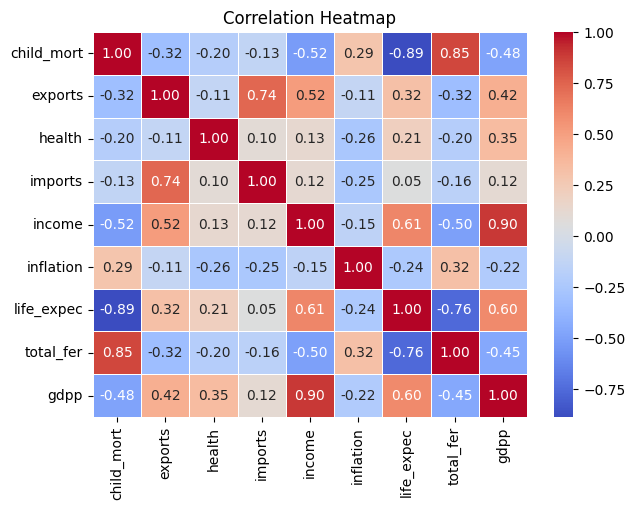

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

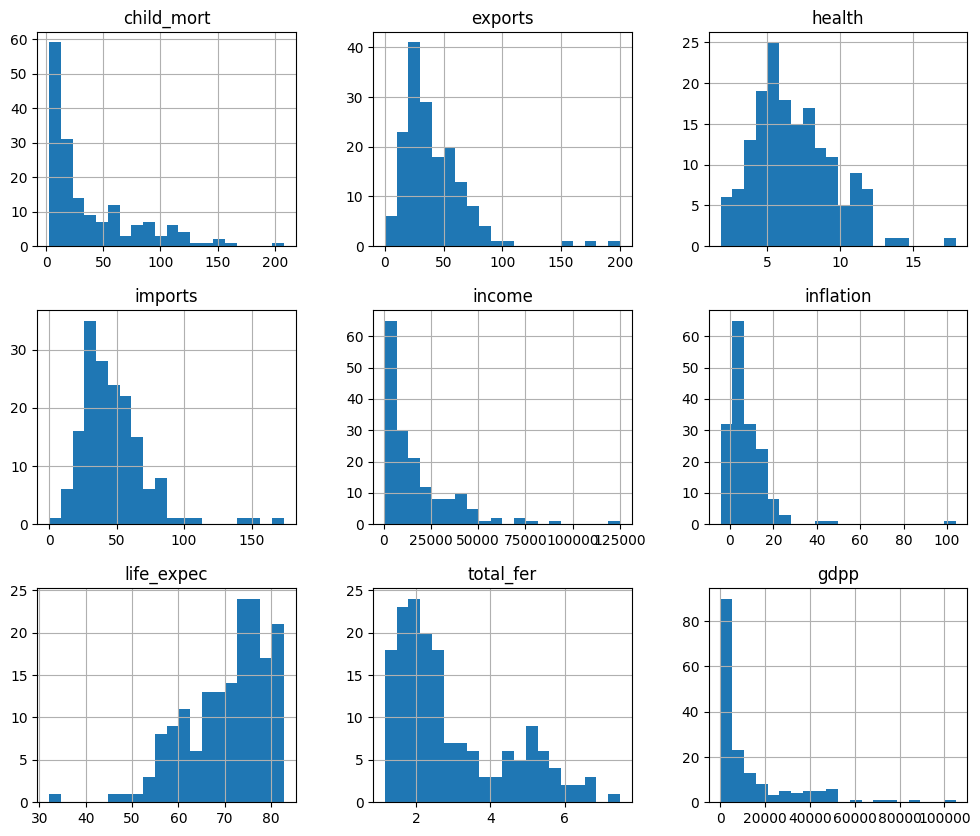

In [61]:
data.hist(figsize=(12, 10), bins=20)
plt.show()

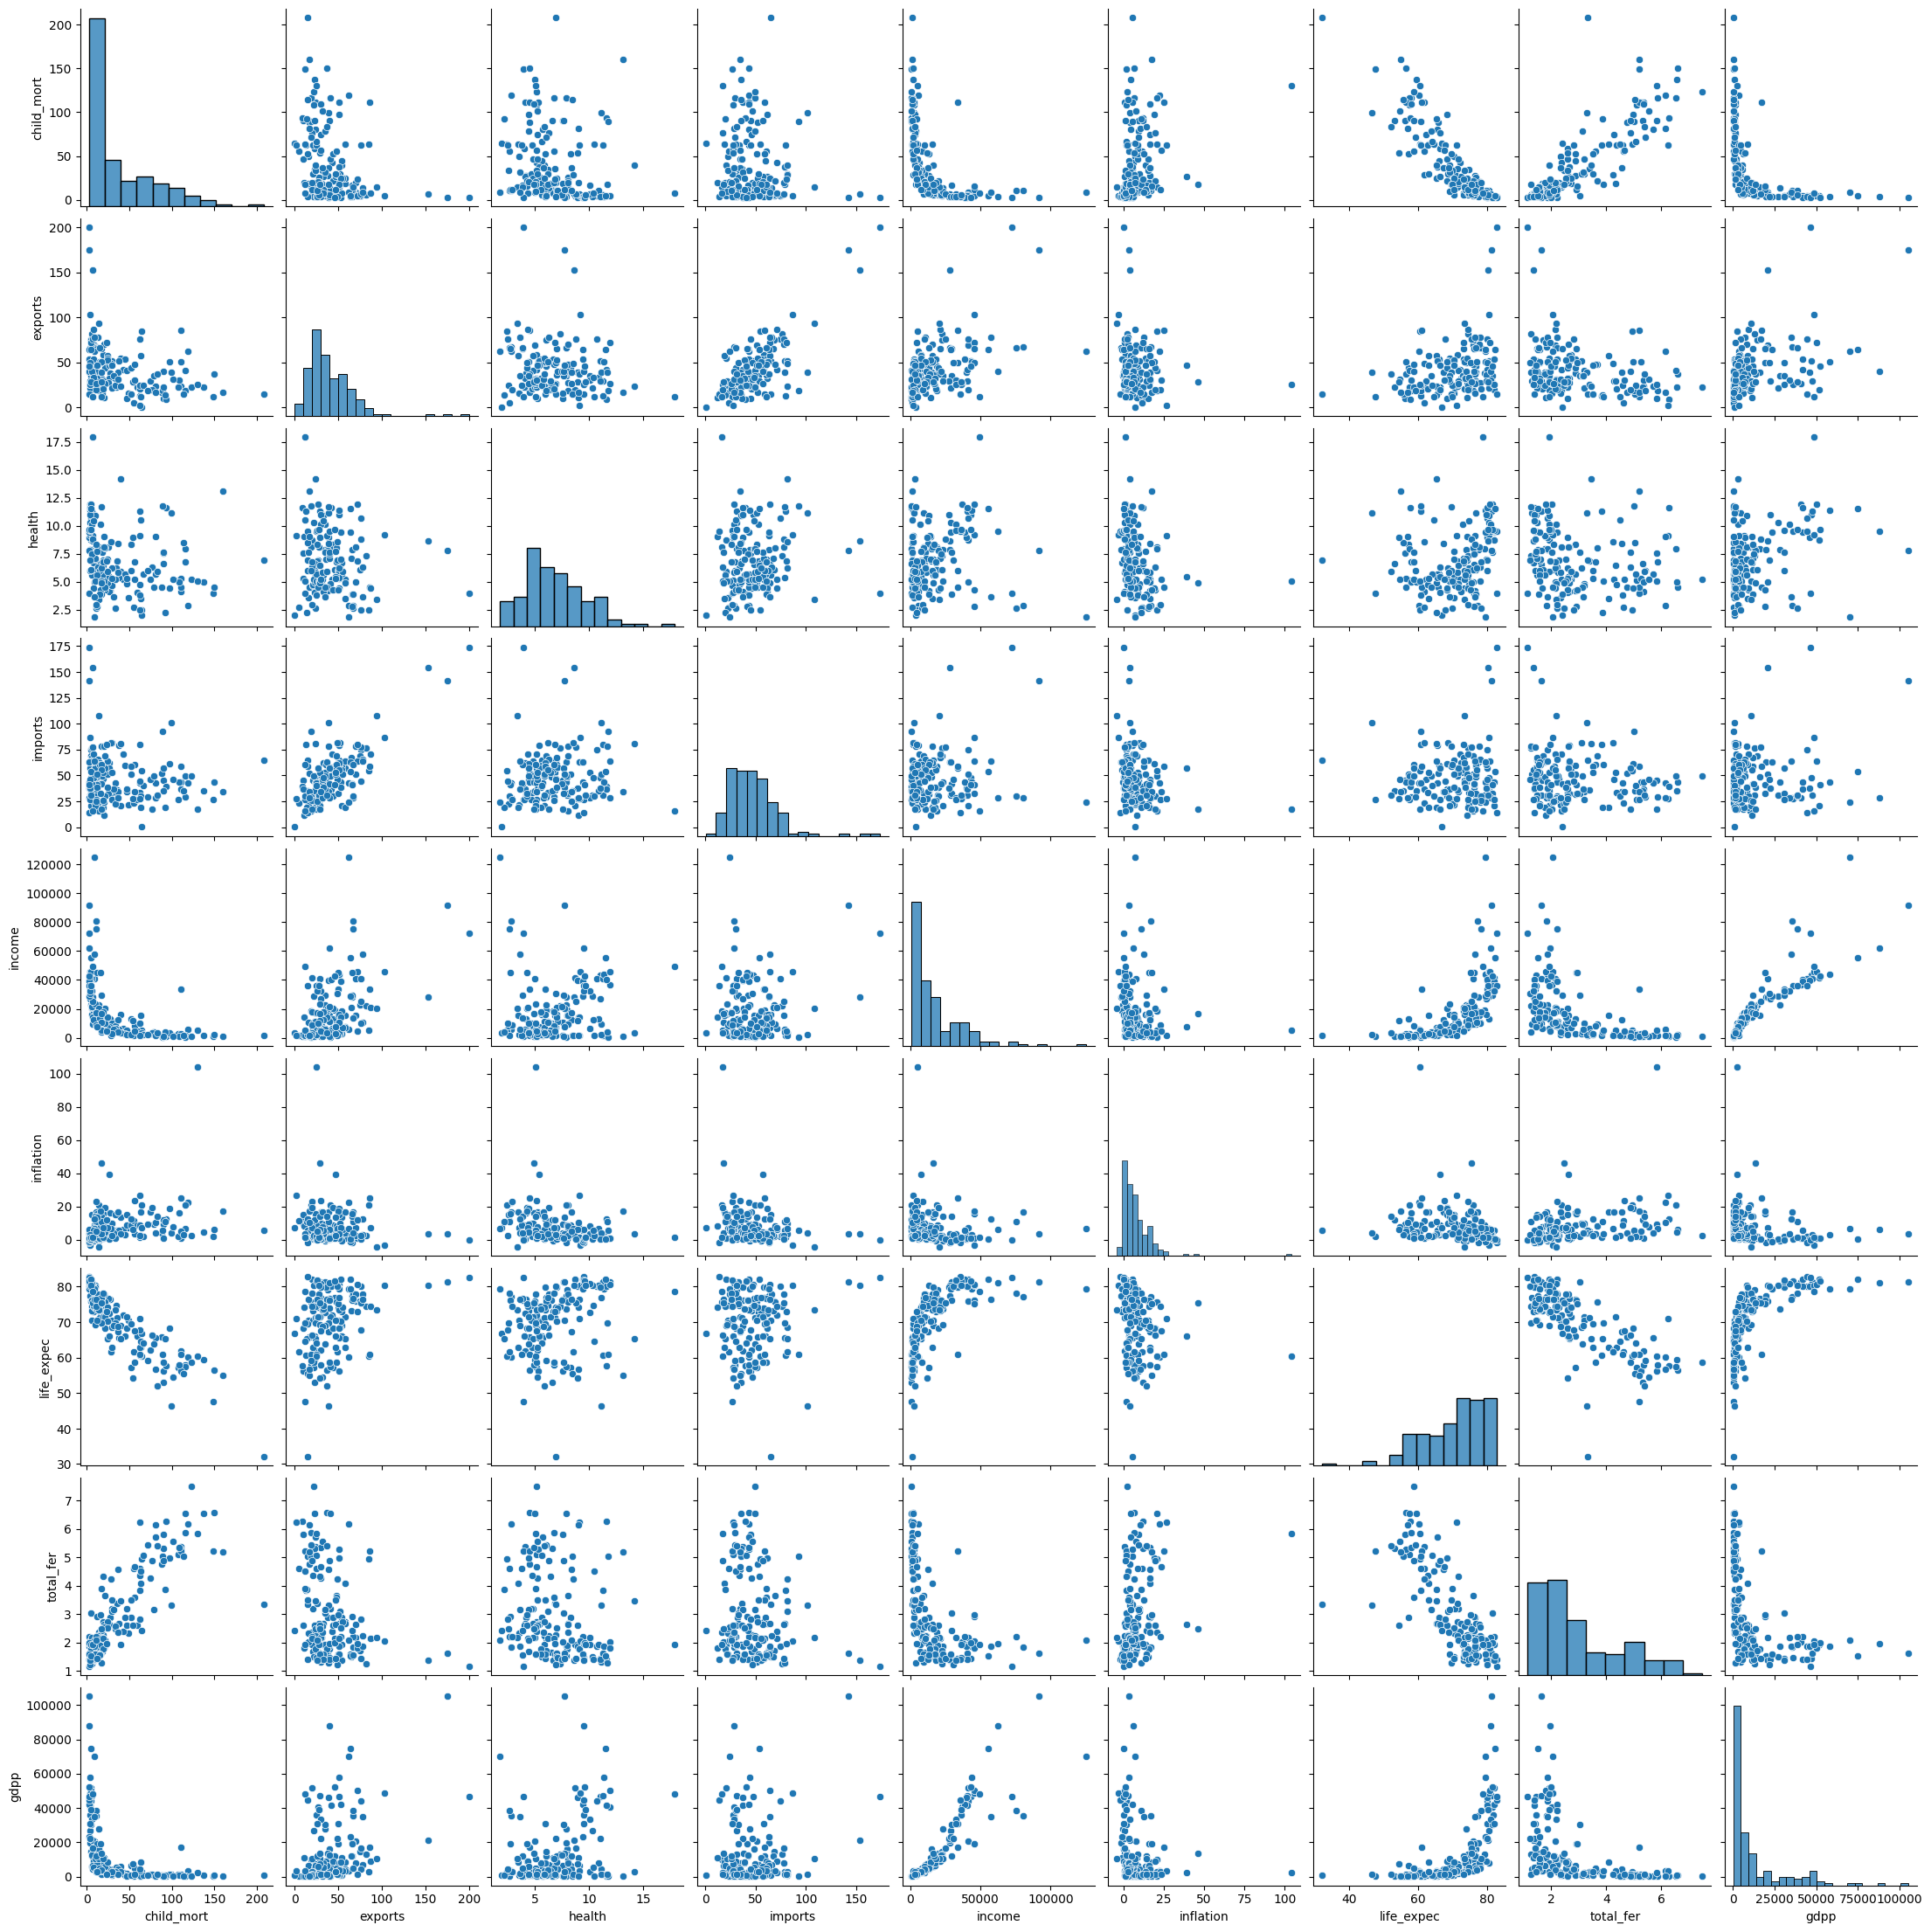

In [62]:
sns.pairplot(data)
plt.show()

#### Many outliers are presented in the column 'income' and 'gdpp'

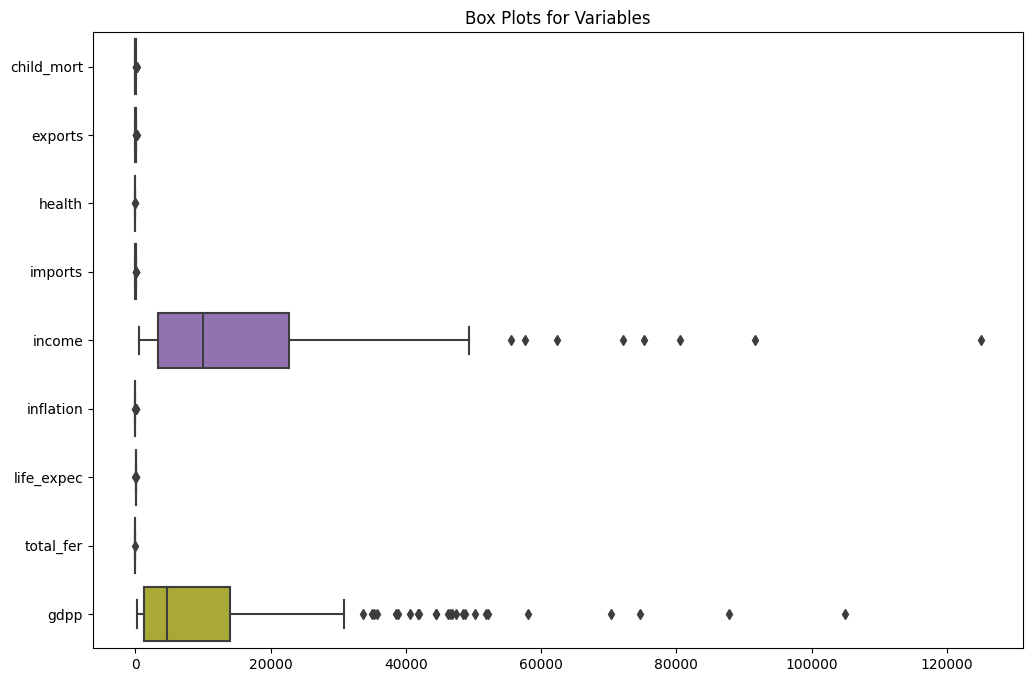

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plots for Variables')
plt.show()

In [64]:
data_new = data.drop('income', axis=1)
data_new = data_new.drop('gdpp', axis=1)
data_new.describe()

,child_mort,exports,health,imports,inflation,life_expec,total_fer
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,7.781832,70.555689,2.947964
std,40.328931,27.412010,2.746837,24.209589,10.570704,8.893172,1.513848
min,2.600000,0.109000,1.810000,0.065900,-4.210000,32.100000,1.150000
25%,8.250000,23.800000,4.920000,30.200000,1.810000,65.300000,1.795000
50%,19.300000,35.000000,6.320000,43.300000,5.390000,73.100000,2.410000
75%,62.100000,51.350000,8.600000,58.750000,10.750000,76.800000,3.880000
max,208.000000,200.000000,17.900000,174.000000,104.000000,82.800000,7.490000


#### Many outliers are presented in the column 'child_mort', 'exports', 'imports' and 'inflation'

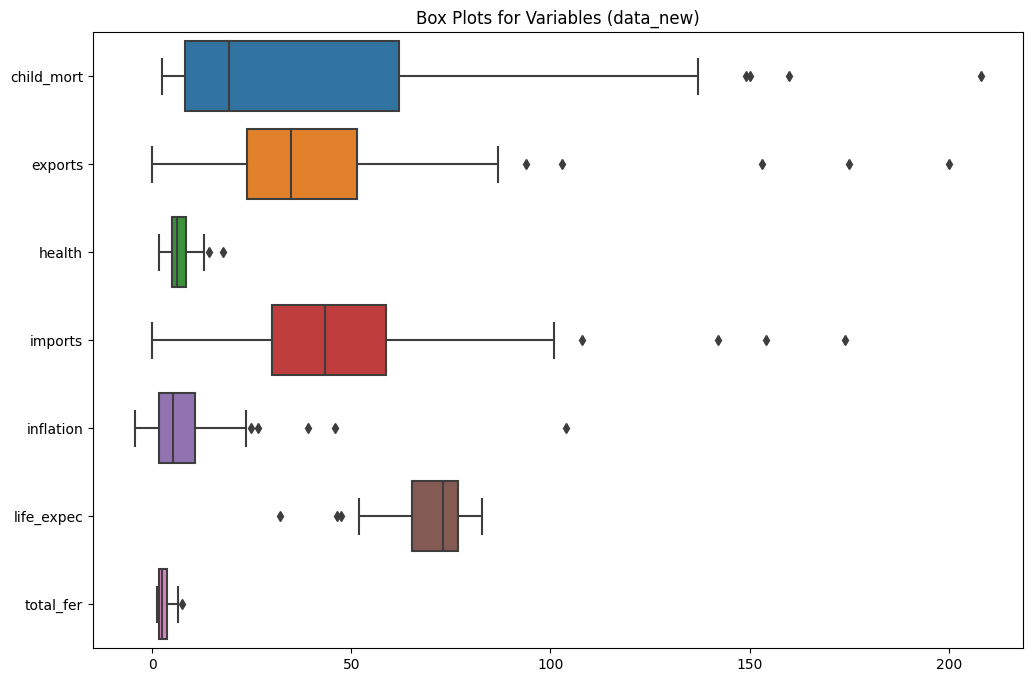

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_new, orient='h')
plt.title('Box Plots for Variables (data_new)')
plt.show()

# Pre-Processing

In [66]:
data.info()
data_new = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [67]:
# # Identify and handle outliers using the IQR method for specific columns
# columns_to_handle_outliers = ['income', 'gdpp', 'child_mort', 'exports', 'imports', 'inflation', 'life_expec']

# for column in columns_to_handle_outliers:
#     # Calculate the IQR for the column
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define the upper and lower bounds to identify outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Handle outliers by capping values at the upper and lower bounds
#     data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# # Display basic statistics after handling outliers
# print("\nBasic Statistics after Handling Outliers:")
# print(data.describe())

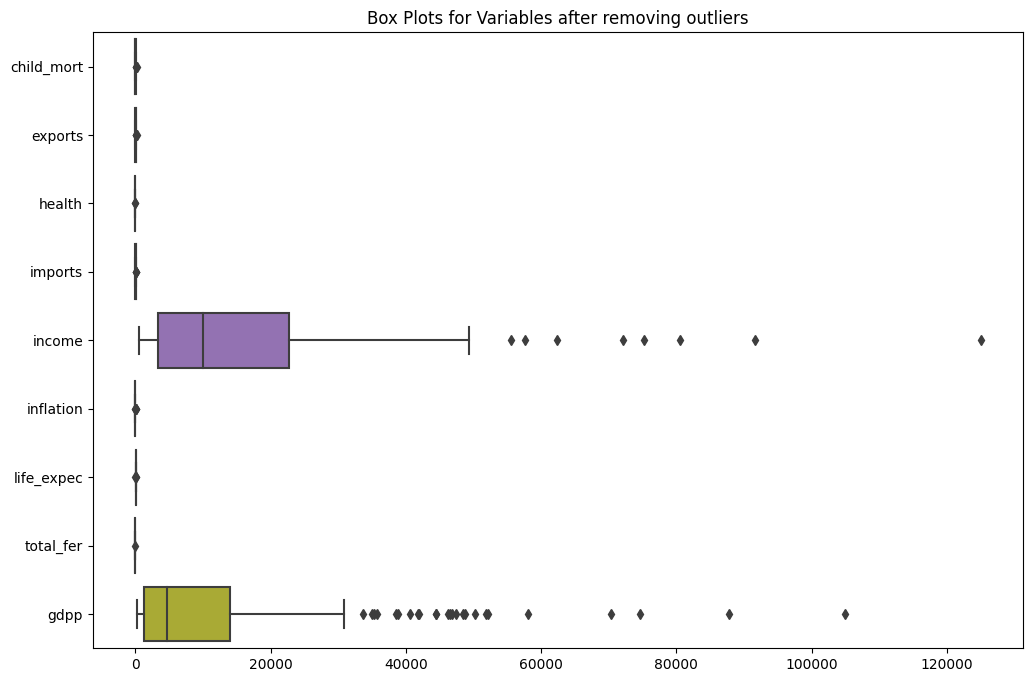

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plots for Variables after removing outliers')
plt.show()

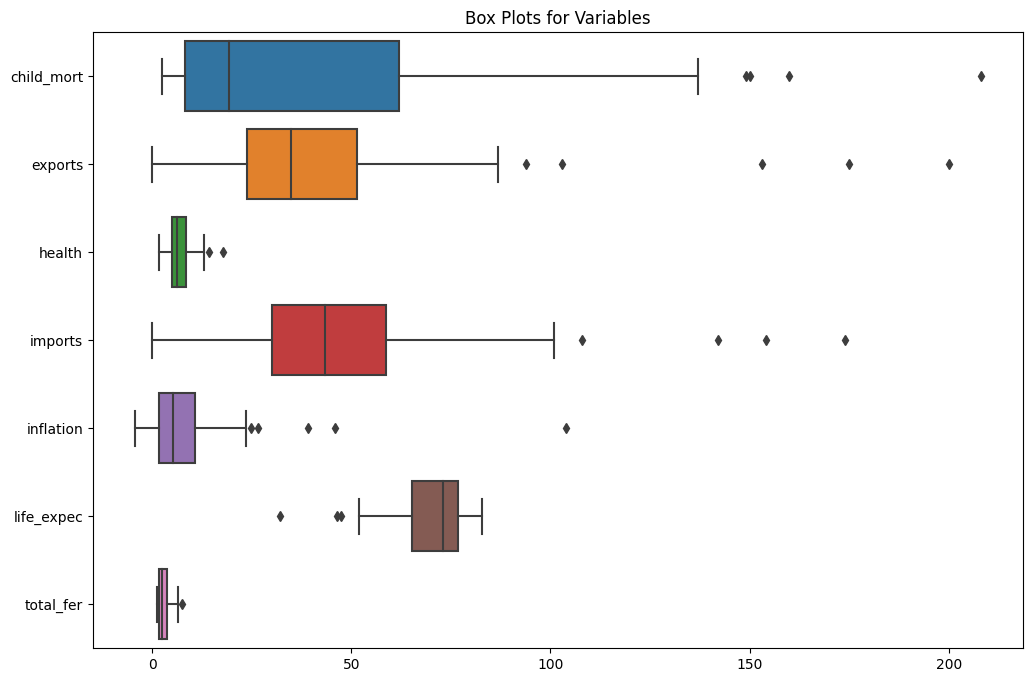

In [69]:
data_new = data.drop(labels=['income', 'gdpp'], axis=1)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_new, orient='h')
plt.title('Box Plots for Variables')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler

continous_columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
data[continous_columns] = StandardScaler().fit_transform(data[continous_columns])

In [71]:
from sklearn.preprocessing import LabelEncoder

data['country'] =  LabelEncoder().fit_transform(data['country'])
data = data.drop('country', axis = 1)
print(data)


     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

# PCA

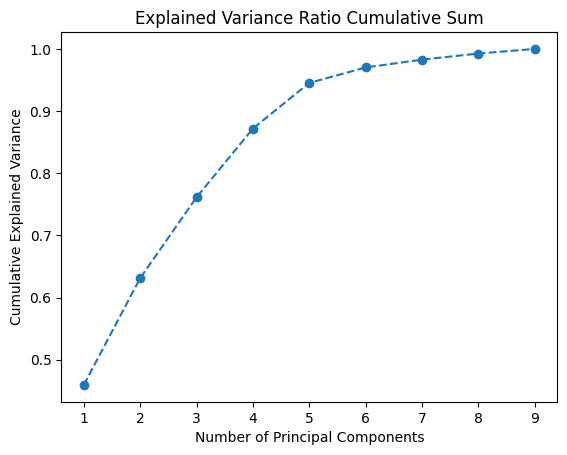

In [72]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(data)

explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio Cumulative Sum')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [85]:
# Determine the optimal number of principal components
cumulative_variance_threshold = 0.95
optimal_components = len(explained_variance_ratio[explained_variance_ratio.cumsum() < cumulative_variance_threshold]) + 1
print(f'Optimal Number of Components: {optimal_components}')

Optimal Number of Components: 6


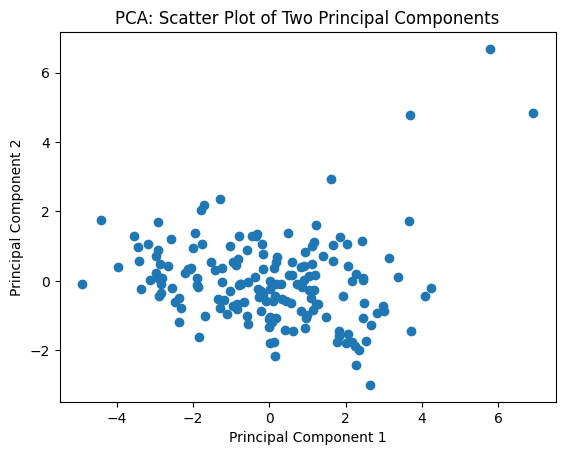

In [74]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
data_optimal_pca = pca.fit_transform(data)

# Scatter plot
plt.scatter(data_optimal_pca[:, 0], data_optimal_pca[:, 1])
plt.title('PCA: Scatter Plot of Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

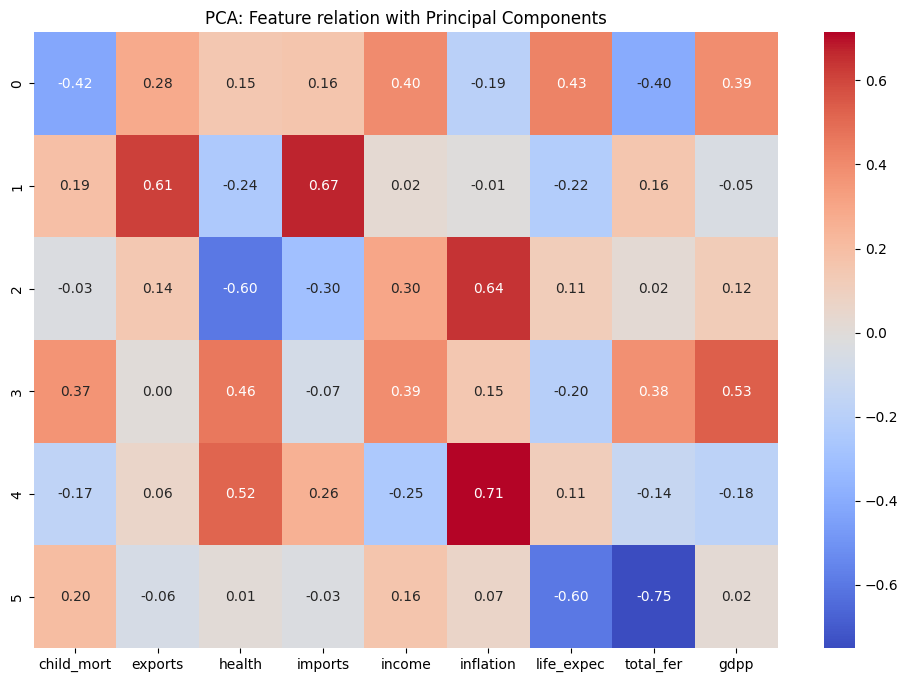

In [75]:
pc_loadings_df = pd.DataFrame(pca.components_, columns=continous_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(pc_loadings_df, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=1, yticklabels=1)
plt.title('PCA: Feature relation with Principal Components')
plt.show()

# K-means Clustering

### Elbow Method

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.

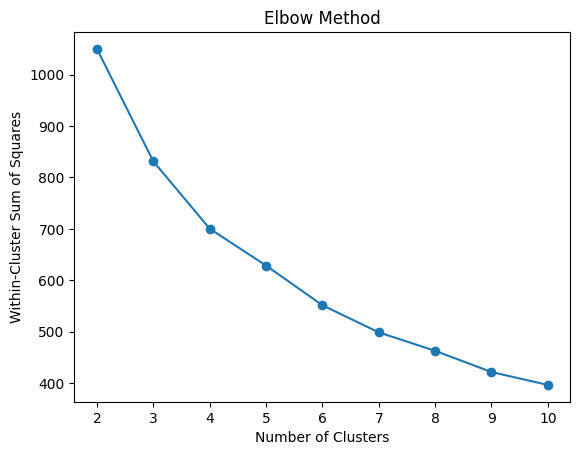

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow_values = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300)
    kmeans.fit(data_pca)
    elbow_values.append(kmeans.inertia_)


# Plot the elbow method
plt.plot(range(2, 11), elbow_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

### Silhoutte Score

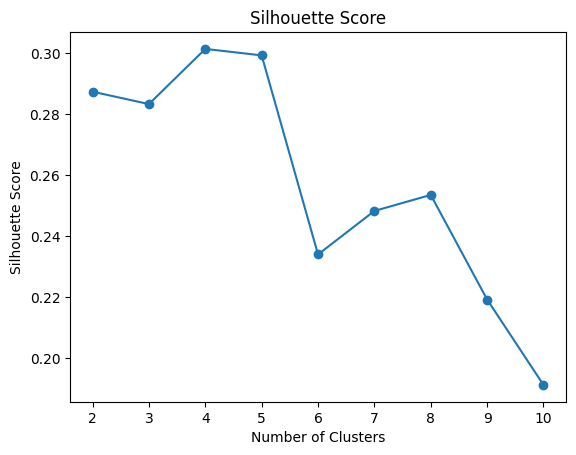

Optimal Number of Clusters: 4


In [86]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(data_pca)
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because the index starts from 0
print(f'Optimal Number of Clusters: {optimal_clusters}')

In [78]:
# Apply K-Means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_optimal.fit(data_pca)

# Add cluster labels to the original DataFrame
data['cluster'] = kmeans_optimal.labels_

### Analysis of Clusters

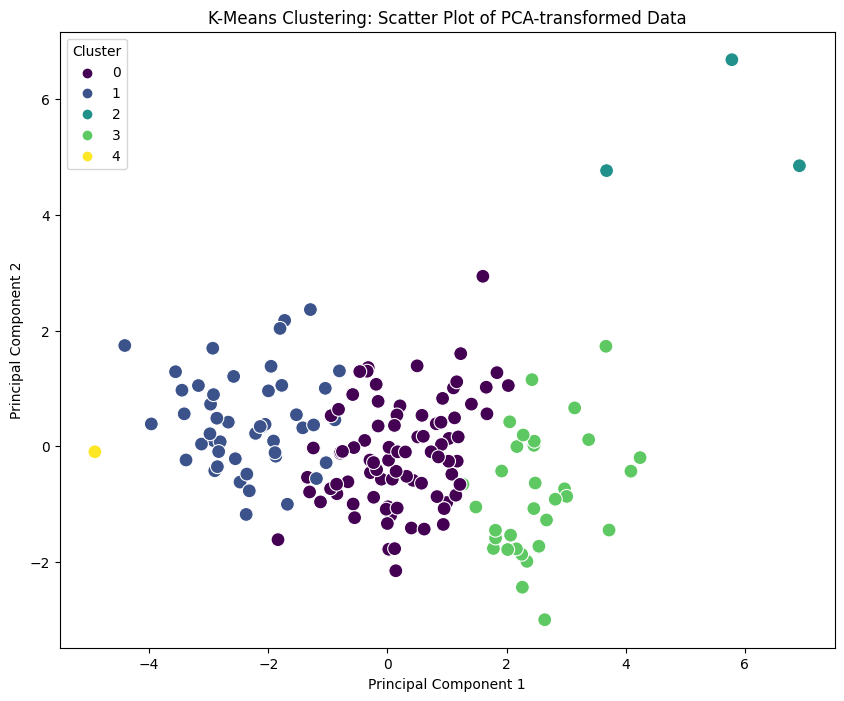

In [79]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering: Scatter Plot of PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

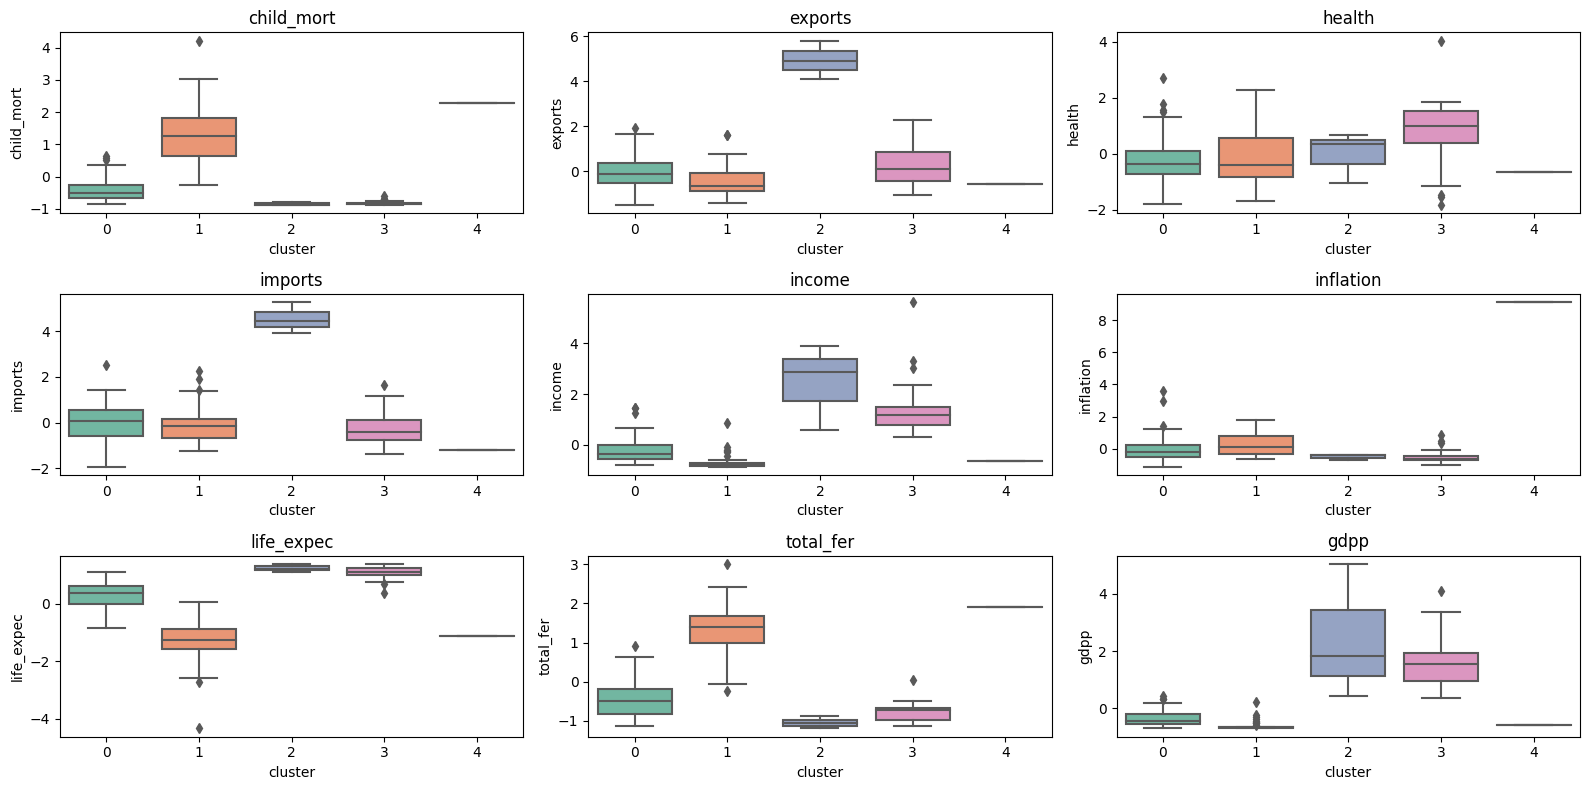

In [80]:
# Custom color palette for clusters
custom_palette = sns.color_palette("Set2", n_colors=len(data['cluster'].unique()))

plt.figure(figsize=(16, 8))
for i, column in enumerate(continous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='cluster', y=column, data=data, palette=custom_palette)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [81]:
from tabulate import tabulate

# Cluster means with global statistics
global_means = data[continous_columns].mean()
cluster_means = data.groupby('cluster')[continous_columns].mean()

# Print means in table format
print('\nGlobal Means:')
print(tabulate(global_means.reset_index(), headers=['Feature', 'Mean'], tablefmt='grid'))
print('\nCluster Means:')
print(tabulate(cluster_means.reset_index(), headers=['Cluster', 'Feature', 'Mean'], tablefmt='grid'))



Global Means:
+----+------------+--------------+
|    | Feature    |         Mean |
+====+============+==============+
|  0 | child_mort | -3.7229e-17  |
+----+------------+--------------+
|  1 | exports    |  2.12737e-16 |
+----+------------+--------------+
|  2 | health     |  5.50458e-16 |
+----+------------+--------------+
|  3 | imports    |  2.76559e-16 |
+----+------------+--------------+
|  4 | income     | -7.97765e-17 |
+----+------------+--------------+
|  5 | inflation  | -1.06369e-17 |
+----+------------+--------------+
|  6 | life_expec |  3.69631e-16 |
+----+------------+--------------+
|  7 | total_fer  |  3.0448e-16  |
+----+------------+--------------+
|  8 | gdpp       |  5.85028e-17 |
+----+------------+--------------+

Cluster Means:
+----+----+-----------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+
|    |    |           |             |             |            |           |           |   Cluster |   Featur

In [82]:
feature_importance = (cluster_means - global_means).abs().mean(axis=0).sort_values(ascending=False)
print('\nFeature Importance:')
print(feature_importance)


Feature Importance:
inflation     2.071029
imports       1.238019
exports       1.224229
child_mort    1.134773
gdpp          1.114577
total_fer     1.101955
income        1.075720
life_expec    0.998159
health        0.368113
dtype: float64


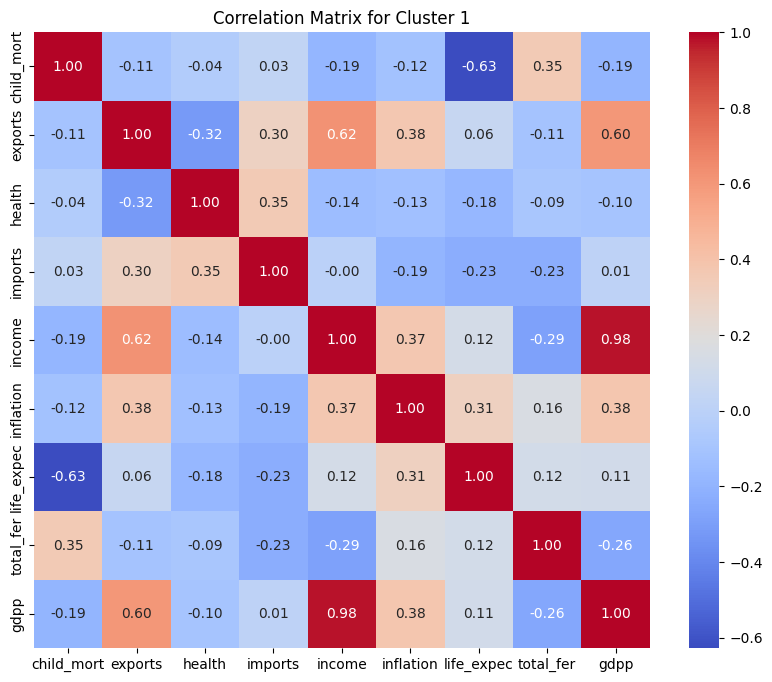

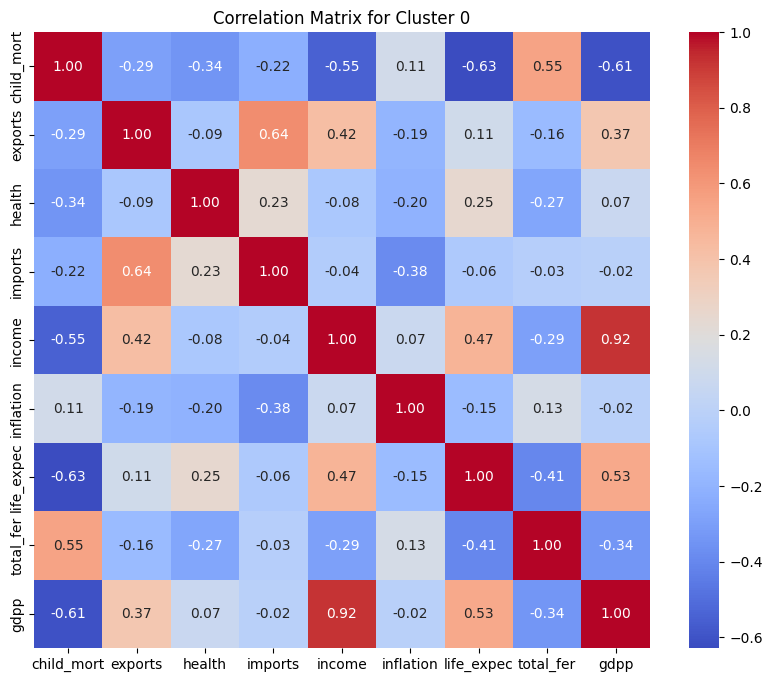

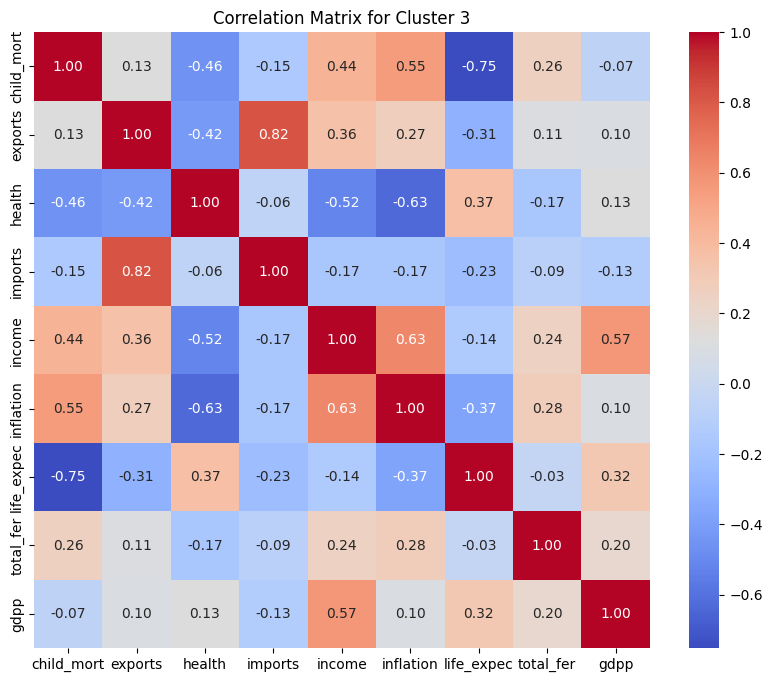

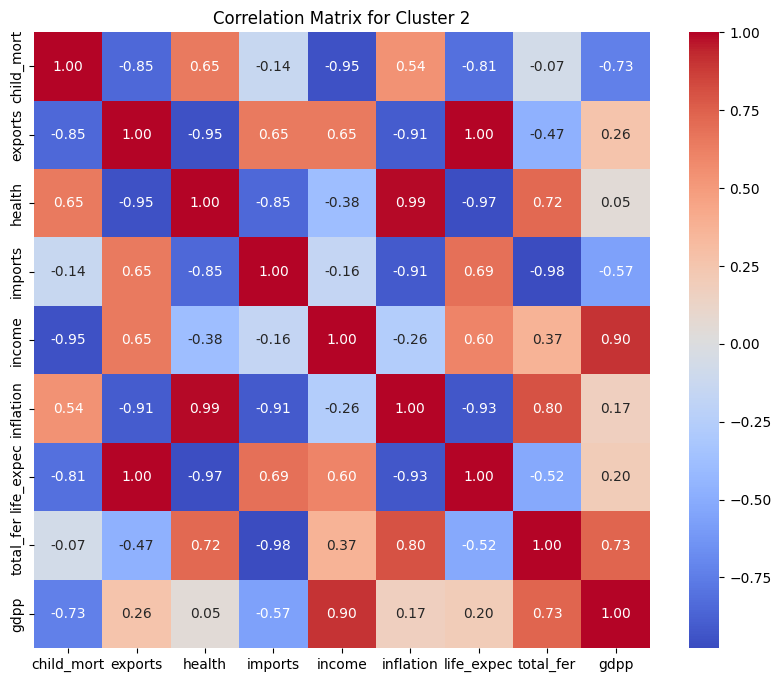

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


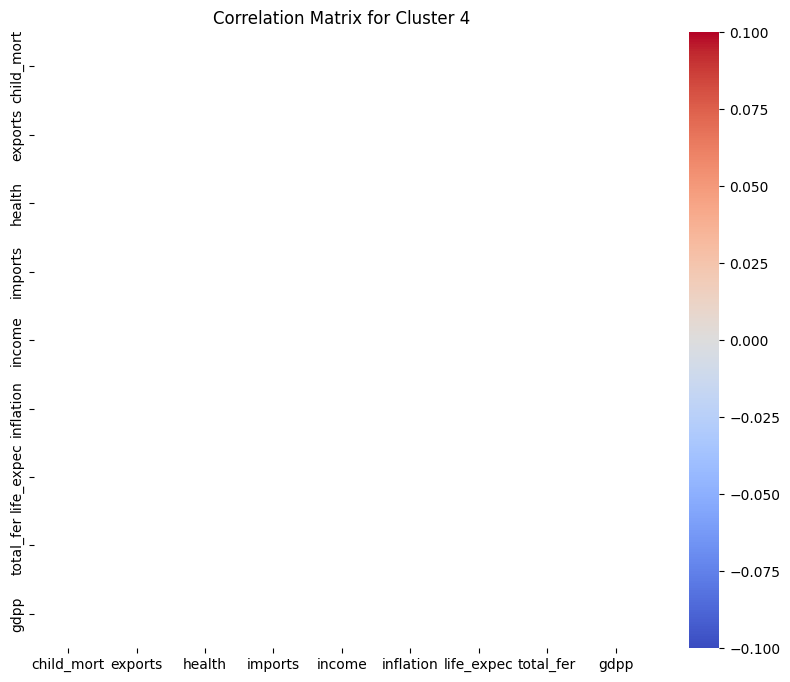

In [83]:
# Correlation analysis within each cluster
for cluster_id in data['cluster'].unique():
    cluster_subset = data[data['cluster'] == cluster_id]
    cluster_corr = cluster_subset[continous_columns].corr()

    # Plot heatmap for each cluster
    plt.figure(figsize=(10, 8))
    sns.heatmap(cluster_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title(f'Correlation Matrix for Cluster {cluster_id}')
    plt.show()